In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Supervised
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import XGBRegressor


## Unsupervised
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Semi-Supervised
from sklearn.semi_supervised import LabelSpreading


## Deep Learning
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
# PyTorch
import torch
import torch.nn as nn

# Stardardization and Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Evaluating Models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df_interest = pd.read_csv('data/data_set.csv')
df_interest.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0


In [4]:
df_interest[['fico_low', 'fico_high']] = df_interest['fico_range'].str.split('-', expand=True).astype(int)

In [5]:
df_interest['percent_unfunded'] =  1 - (df_interest['amount_funded_by_investors'] / df_interest['amount_requested'])
df_interest['fico_average'] = (df_interest['fico_high'] + df_interest['fico_low']) / 2
df_interest['monthly interest'] = (df_interest['amount_requested']/df_interest['loan_length'])*(df_interest['interest_rate']/100)
df_interest

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,percent_unfunded,fico_average,monthly interest
0,8.90,735-739,20000.0,20000.00,36.0,735,739,0.000000,737.0,49.444444
1,12.12,715-719,19200.0,19200.00,36.0,715,719,0.000000,717.0,64.640000
2,21.98,690-694,35000.0,35000.00,60.0,690,694,0.000000,692.0,128.216667
3,9.99,695-699,10000.0,9975.00,36.0,695,699,0.002500,697.0,27.750000
4,11.71,695-699,12000.0,12000.00,36.0,695,699,0.000000,697.0,39.033333
...,...,...,...,...,...,...,...,...,...,...
2493,16.77,705-709,30000.0,29950.00,60.0,705,709,0.001667,707.0,83.850000
2494,14.09,740-744,16000.0,16000.00,60.0,740,744,0.000000,742.0,37.573333
2495,13.99,680-684,10000.0,10000.00,36.0,680,684,0.000000,682.0,38.861111
2496,12.42,675-679,6000.0,6000.00,36.0,675,679,0.000000,677.0,20.700000


In [6]:
length_interest = df_interest.drop(['fico_range', 'fico_low', 'fico_high', 'amount_funded_by_investors'], axis=1)

length_interest

,interest_rate,amount_requested,loan_length,percent_unfunded,fico_average,monthly interest
0,8.90,20000.0,36.0,0.000000,737.0,49.444444
1,12.12,19200.0,36.0,0.000000,717.0,64.640000
2,21.98,35000.0,60.0,0.000000,692.0,128.216667
3,9.99,10000.0,36.0,0.002500,697.0,27.750000
4,11.71,12000.0,36.0,0.000000,697.0,39.033333
...,...,...,...,...,...,...
2493,16.77,30000.0,60.0,0.001667,707.0,83.850000
2494,14.09,16000.0,60.0,0.000000,742.0,37.573333
2495,13.99,10000.0,36.0,0.000000,682.0,38.861111
2496,12.42,6000.0,36.0,0.000000,677.0,20.700000


In [7]:
# no_length_interest = df_interest.drop(['fico_range', 'fico_low', 'fico_high', 'loan_length', 'amount_funded_by_investors'], axis=1)
no_length_interest = df_interest.drop(['fico_range', 'fico_low', 'fico_high'], axis=1)

no_length_interest

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,percent_unfunded,fico_average,monthly interest
0,8.90,20000.0,20000.00,36.0,0.000000,737.0,49.444444
1,12.12,19200.0,19200.00,36.0,0.000000,717.0,64.640000
2,21.98,35000.0,35000.00,60.0,0.000000,692.0,128.216667
3,9.99,10000.0,9975.00,36.0,0.002500,697.0,27.750000
4,11.71,12000.0,12000.00,36.0,0.000000,697.0,39.033333
...,...,...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,0.001667,707.0,83.850000
2494,14.09,16000.0,16000.00,60.0,0.000000,742.0,37.573333
2495,13.99,10000.0,10000.00,36.0,0.000000,682.0,38.861111
2496,12.42,6000.0,6000.00,36.0,0.000000,677.0,20.700000


In [8]:
# plt.boxplot(no_length_interest, label=no_length_interest.columns);

In [9]:
no_length_interest = no_length_interest[no_length_interest['amount_requested'] <= 31000]
no_length_interest

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,percent_unfunded,fico_average,monthly interest
0,8.90,20000.0,20000.00,36.0,0.000000,737.0,49.444444
1,12.12,19200.0,19200.00,36.0,0.000000,717.0,64.640000
3,9.99,10000.0,9975.00,36.0,0.002500,697.0,27.750000
4,11.71,12000.0,12000.00,36.0,0.000000,697.0,39.033333
5,15.31,6000.0,6000.00,36.0,0.000000,672.0,25.516667
...,...,...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,0.001667,707.0,83.850000
2494,14.09,16000.0,16000.00,60.0,0.000000,742.0,37.573333
2495,13.99,10000.0,10000.00,36.0,0.000000,682.0,38.861111
2496,12.42,6000.0,6000.00,36.0,0.000000,677.0,20.700000


In [10]:
X = no_length_interest.drop(columns='interest_rate', axis =1)
y = no_length_interest['interest_rate']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

model_interest = LinearRegression().fit(Xtrain, ytrain)

interest_pred = model_interest.predict(Xtest)


In [11]:
mse = mean_squared_error(ytest, interest_pred)

# returns the same unit as our target variable
rmse = mse ** 0.5  # Square root of MSE

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 2.66
RMSE: 1.63


In [12]:
r2 = r2_score(ytest, interest_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.85


In [13]:
scaler = MinMaxScaler()

scaled_no_length_train = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns)
scaled_no_length_test = pd.DataFrame(scaler.fit_transform(Xtest), columns=Xtest.columns)

scaled_no_length_train

,amount_requested,amount_funded_by_investors,loan_length,percent_unfunded,fico_average,monthly interest
0,0.366667,0.387097,0.0,0.00000,0.105263,0.314526
1,0.400000,0.419355,0.0,0.00000,0.263158,0.281699
2,0.800000,0.806452,1.0,0.00000,0.473684,0.347761
3,0.758333,0.766129,1.0,0.00000,0.368421,0.430119
4,0.379167,0.399194,0.0,0.00000,0.210526,0.254867
...,...,...,...,...,...,...
1938,0.233333,0.258065,0.0,0.00000,0.184211,0.166419
1939,0.800000,0.806452,1.0,0.00000,0.394737,0.424384
1940,0.233333,0.258065,0.0,0.00000,0.315789,0.154134
1941,0.366667,0.120162,0.0,0.68958,0.157895,0.255108


In [14]:
X2 = scaled_no_length_train
y2 = ytrain

model_interest = LinearRegression().fit(X2, y2)

interest_pred_2 = model_interest.predict(scaled_no_length_test)

In [15]:
mse = mean_squared_error(ytest, interest_pred_2)

# returns the same unit as our target variable
rmse = mse ** 0.5  # Square root of MSE

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 3.55
RMSE: 1.89


In [16]:
r2 = r2_score(ytest, interest_pred_2)
print(f"R² Score: {r2:.2f}")

R² Score: 0.79


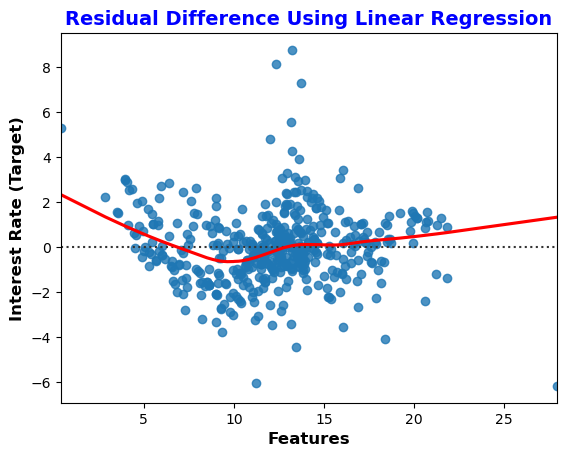

In [31]:
residual = ytest - interest_pred_2

fig,ax = plt.subplots()

sns.residplot(
        x=interest_pred_2,
        y=residual,
        lowess=True,
        line_kws={'color':'red'}, ax=ax
)

ax.set_title('Residual Difference Using Linear Regression', fontsize=14, weight='bold', color='blue')
ax.set_xlabel('Features', fontsize=12, weight='bold', color='black');
ax.set_ylabel('Interest Rate (Target)', fontsize=12, weight='bold', color='black');


## Random Forest Regressor

In [33]:
#scaled_no_length_train
#ytrain

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(scaled_no_length_train, ytrain)
RFR_pred = rf.predict(scaled_no_length_test)

In [34]:
mse = mean_squared_error(ytest, RFR_pred)

# returns the same unit as our target variable
rmse = mse ** 0.5  # Square root of MSE

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 2.27
RMSE: 1.51


In [35]:
r2 = r2_score(ytest, RFR_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.87


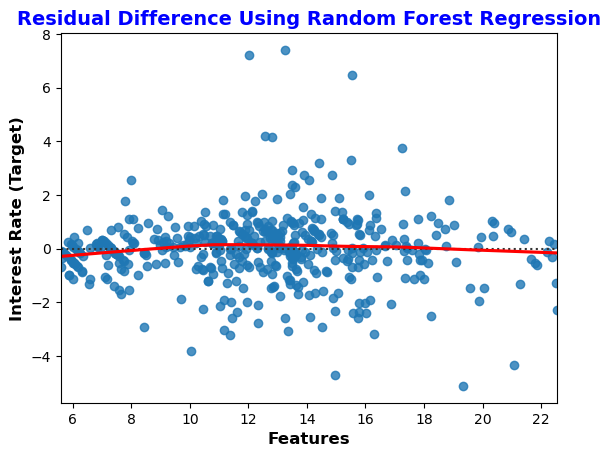

In [36]:
residual_RFR = ytest - RFR_pred

fig,ax = plt.subplots()

sns.residplot(
        x=RFR_pred,
        y=residual_RFR,
        lowess=True,
        line_kws={'color':'red'}, ax=ax,
)

ax.set_title('Residual Difference Using Random Forest Regression', fontsize=14, weight='bold', color='blue')
ax.set_xlabel('Features', fontsize=12, weight='bold', color='black');
ax.set_ylabel('Interest Rate (Target)', fontsize=12, weight='bold', color='black');


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Xtrain, ytrain)
RFR_pred = rf.predict(Xtest)

In [ ]:
mse = mean_squared_error(ytest, RFR_pred)

# returns the same unit as our target variable
rmse = mse ** 0.5  # Square root of MSE

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 1.01
RMSE: 1.00


In [ ]:
r2 = r2_score(ytest, RFR_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.94


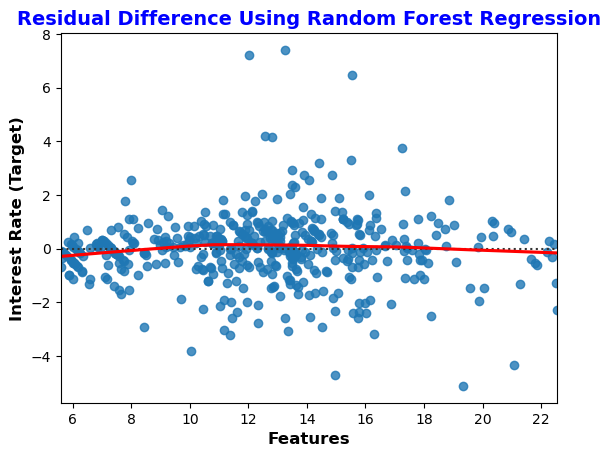

In [37]:
residual_RFR = ytest - RFR_pred

fig,ax = plt.subplots()


sns.residplot(
        x=RFR_pred,
        y=residual_RFR,
        lowess=True,
        line_kws={'color':'red'}, ax=ax
)
ax.set_title('Residual Difference Using Random Forest Regression', fontsize=14, weight='bold', color='blue')
ax.set_xlabel('Features', fontsize=12, weight='bold', color='black');
ax.set_ylabel('Interest Rate (Target)', fontsize=12, weight='bold', color='black');

## XGBoost

In [39]:
xgb = XGBRegressor(n_estimator=100, learning_rate=0.1, random_state=42)
xgb.fit(Xtrain, ytrain)
xgb_pred = xgb.predict(Xtest)


c:\Users\vchan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
mse = mean_squared_error(ytest, xgb_pred)

# returns the same unit as our target variable
rmse = mse ** 0.5  # Square root of MSE

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 0.91
RMSE: 0.95


In [41]:
r2 = r2_score(ytest, xgb_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.95


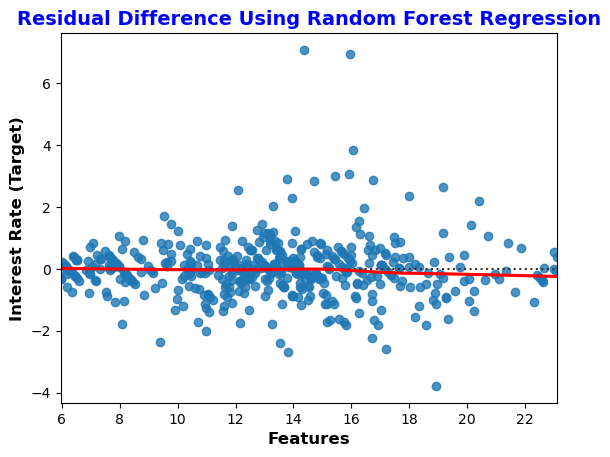

In [42]:
residual_xgb = ytest - xgb_pred

fig, ax = plt.subplots()

sns.residplot(
        x= xgb_pred,
        y=residual_xgb,
        lowess=True,
        line_kws={'color':'red'}, ax=ax,
)

ax.set_title('Residual Difference Using Random Forest Regression', fontsize=14, weight='bold', color='blue')
ax.set_xlabel('Features', fontsize=12, weight='bold', color='black');
ax.set_ylabel('Interest Rate (Target)', fontsize=12, weight='bold', color='black');